# Lab 1: Set Up the Lab Environment

This introductory lab guides the attendees with the following activities:

1. Setting up the AI Project in the AI Foundry
2. Deploying an LLM and embedding models
3. Establish connectivity from VS Code to the AI Project
4. Perform a simple Chat completion call to the model

#### Step 1: Creating AI Project in AI Foundry </h4>

1. Login to AI Foundry at https://ai.azure.com
2. Click on **'+ Create new'** at the top of the screen
3. Select **AI hub resource** and click **Next**. Note, this is option that does NOT have recommended next to it. For this lab specifically, it will be best to use Azure hub resource.
4. Give your Project and Hub a name. You do need to click **Rename hub**. 
5. Click the right down arrow next to Advanced Options

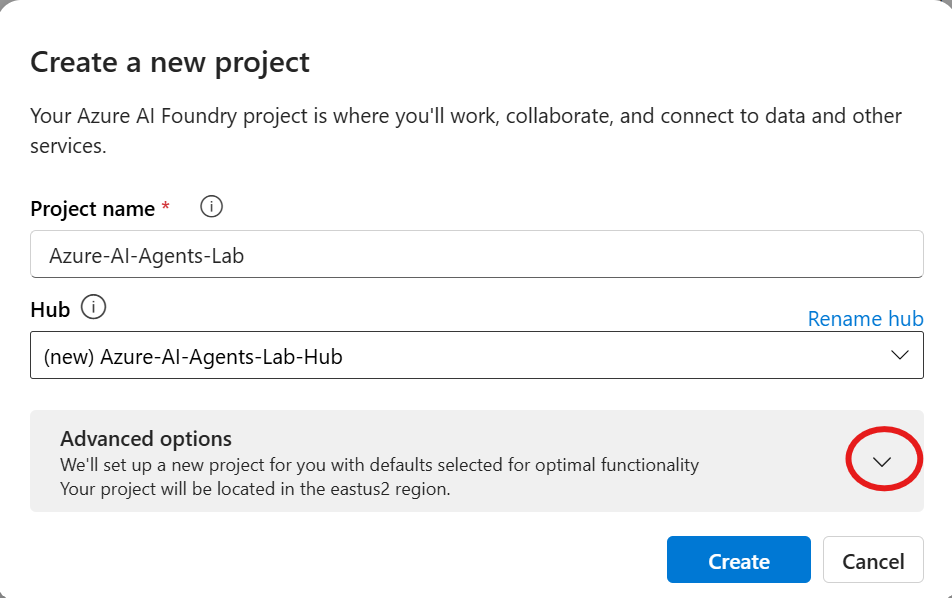

6. Select your subcription, create a new resource group, and ensure you are in region East US 2. Then, click **Create**
*Note: It's best practice to begin all resource groups with re-*

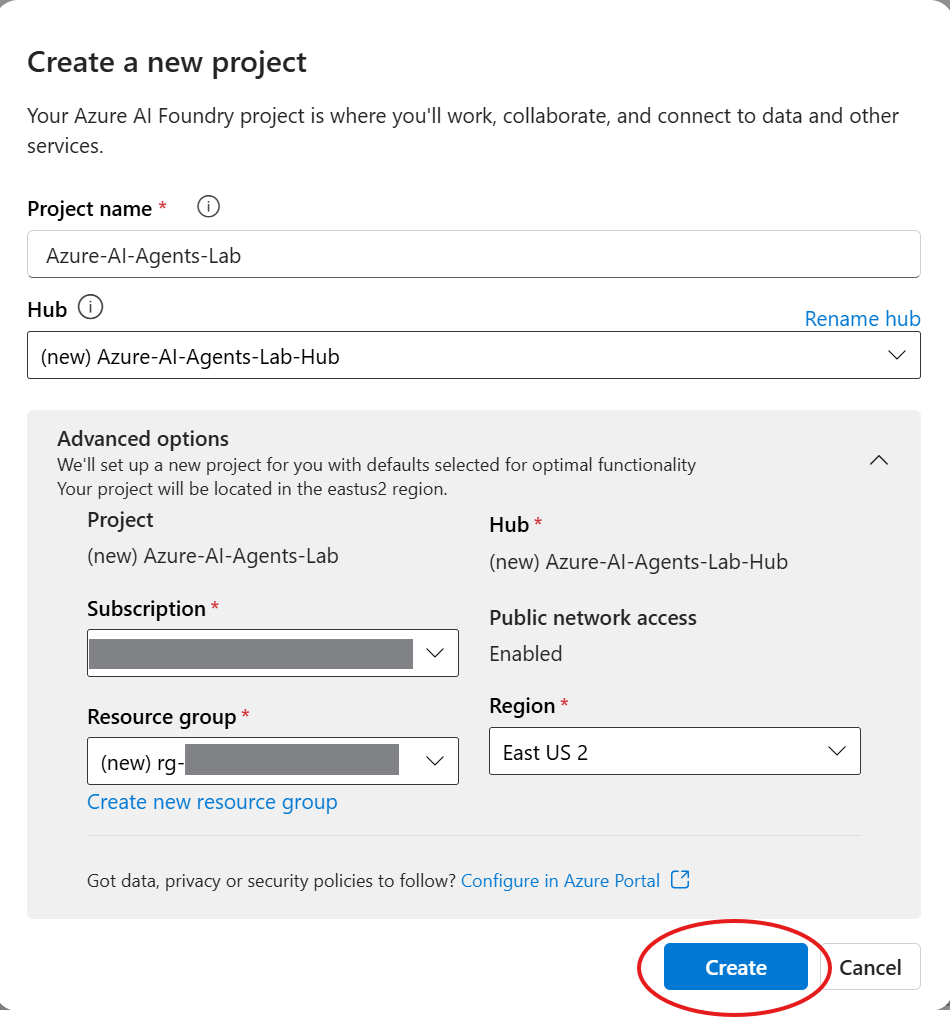

7. Once your project loads, it should look something like below. Voila! You have now set up your lab environment.

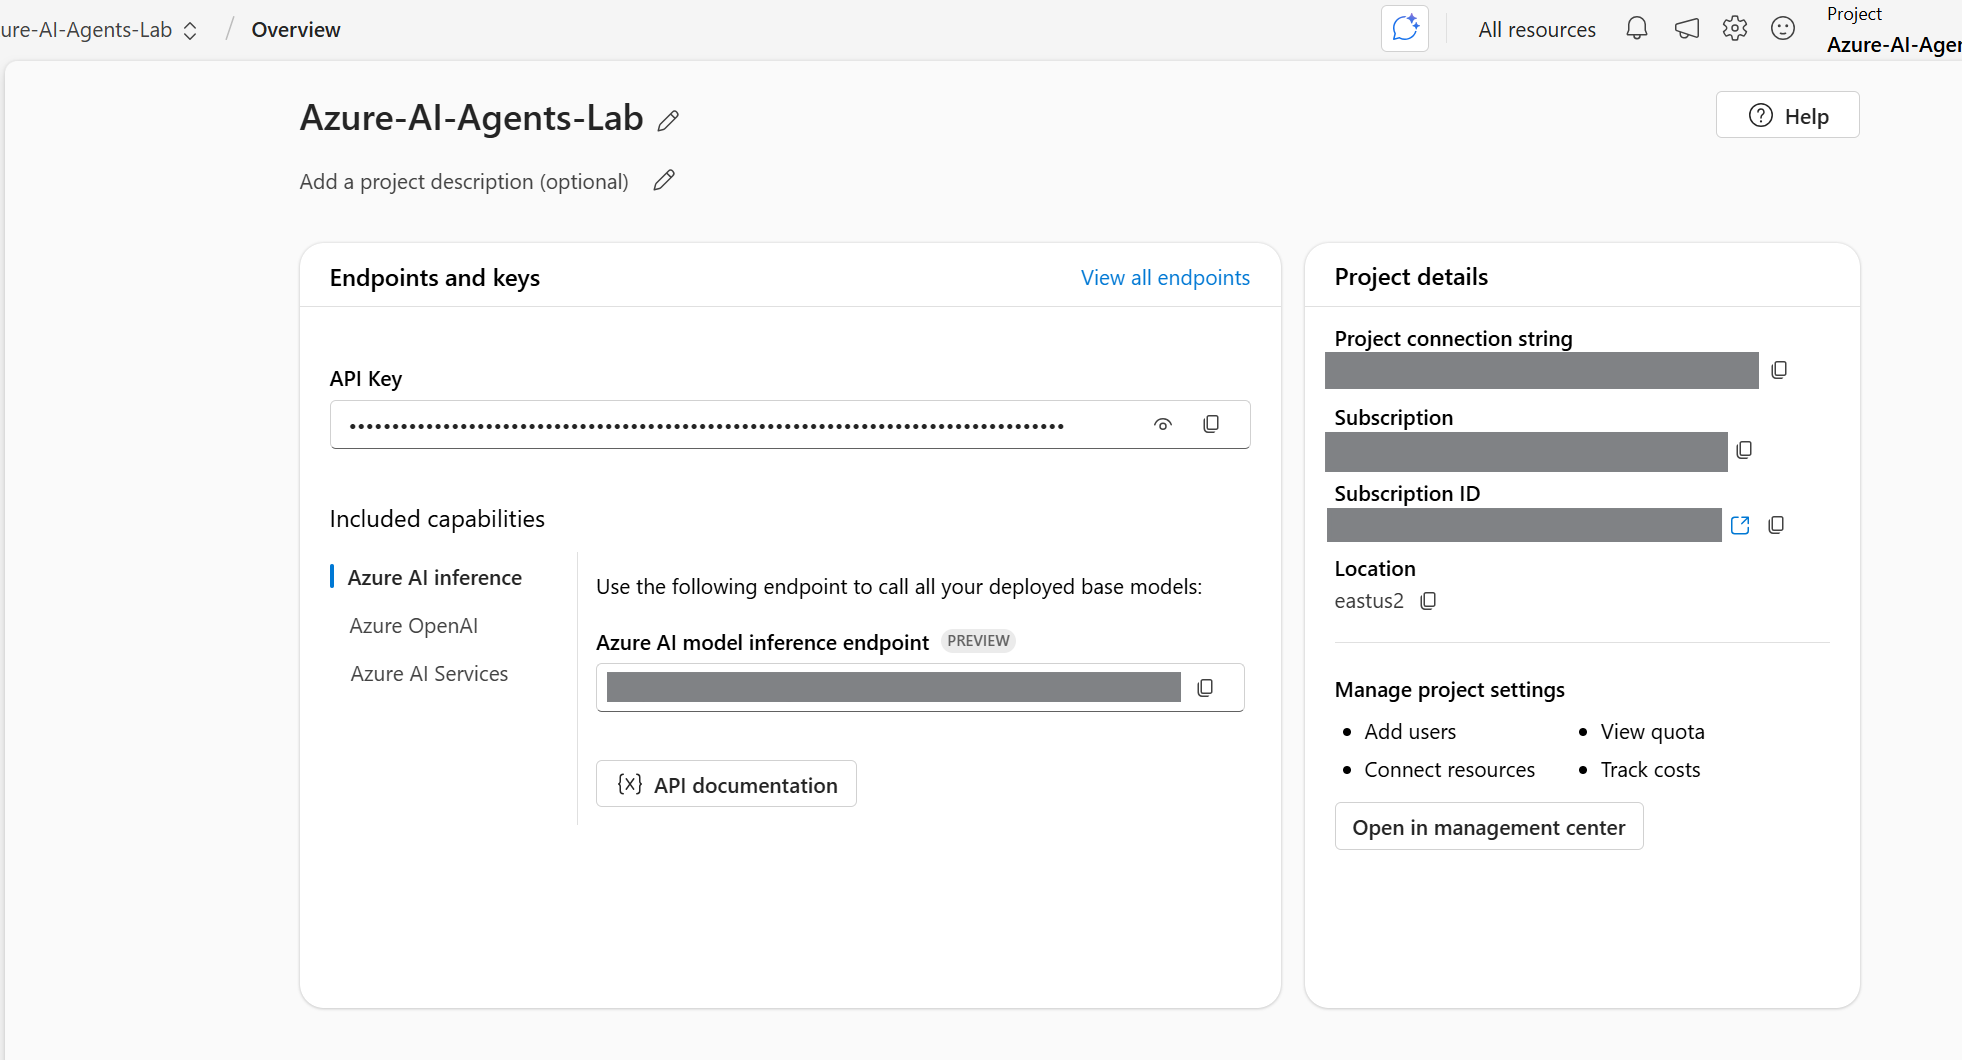



#### Step 2: Deploy gpt-4.1 model

In this lab, we are using two types of AI models: a large language model (Chat GPT-4.1) for generating conversational responses, and a text embedding model (Text Embedding 3 Large) for converting text into numerical vectors. The language model enables natural language interactions, while the embedding model is used to represent text data in a way that makes it easier to search, compare, and analyze within AI applications.

In this step, we will deploy Chat GPT-4.1. In another step, we will deploy Text Embedding 3 Large. This is due to the nature of the Azure AI Foundry Workflow. We will want to deploy Chat GPT-4.1 in our Project and Text Embedding 3 Large from our Open Azure AI resource. Follow the instructions to do so. 

1. In you AI Foundry project, under My assets section, click on **Models + endpoints**
2. Click on **+Deploy model** and **Deploy base model**.
3. Select gpt-4.1 and then press **Confirm**.
4. Select **Customize** and set the **Tokens per Minute Rate Limit** to 200k. Everything else can remain unchanged. 

*Note: Please ensure your deployment is set to East US 2 if that is not the default setting. Models must be deployed in the same region as your project*


#### Step 3: Create an Azure OpenAI resource and deploy the text embedding model

The import and vectorize wizard in Azure AI Search, which will be used in subsequent labs, does not yet support text embedding models within your AI Foundry project. Because of this, we need to create an Azure OpenAI service and deploy a text embedding model there. We will use this text embedding model later to vectorize our health plan documents.

##### Creating the Azure OpenAI resource (AOAI)

1. In the [Azure Portal](https://azure.microsoft.com/en-us/), navigate to the resource group that was created upon setting up your AI Foundry Hub and Project.
2.  On the overview page of your resource group, click **+ Create** Deploy an Azure OpenAI Service resource in this resource group. 

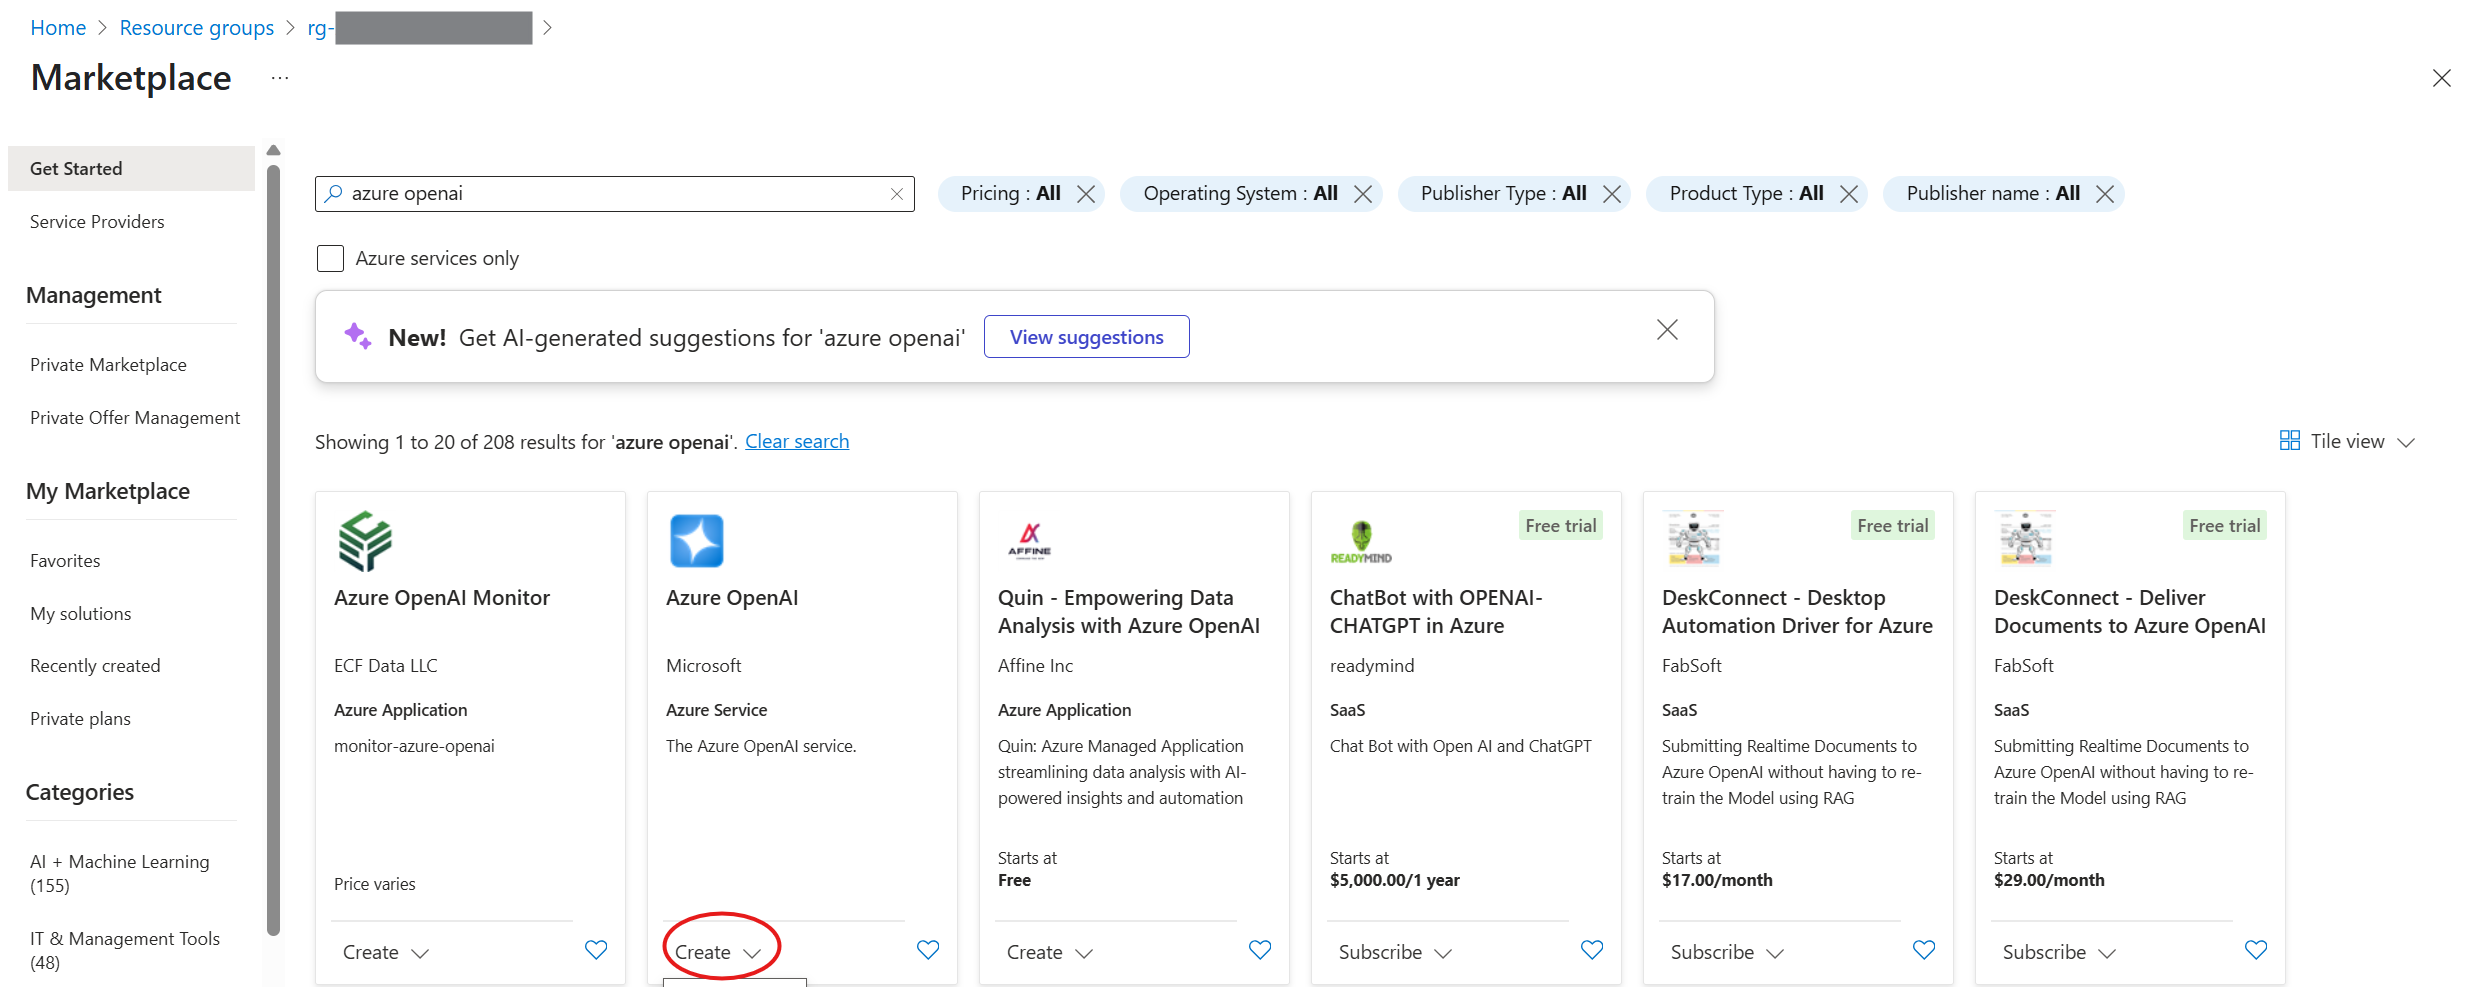

3. Make sure your resource group is the same, select your region and name, and select pricing (which should be Standard S0). Everything else should be unchanged. Click **Create**. 
4. Once deployed, click **Go to resource**. Click **Explore Azure AI Foundry Portal**

##### Deploying the text embedding model

1. On the left hand side, click **Deployments** under Shared resources. 
2. Click on **+Deploy model** and **Deploy base model**. 
3. Select text-embedding-3-large and then press **Confirm**.
4. Click **Deploy**. 

*Note: Please ensure your deployment is set to East US 2 if that is not the default setting. Models must be deployed in the same region as your project*

#### Step 4: Create and assign permissions to the Azure AI Search resource

You will need Azure AI Search Resource for the remaining labs. Let's set that up now and provide the proper permissions. 

##### Creating the Resource

1. Back in [Azure Portal](https://azure.microsoft.com/en-us/), navigate to your resource group you have been using.
2. On the overview page of your resource group, click **+ Create** Deploy an Azure AI Search resource in this resource group. 

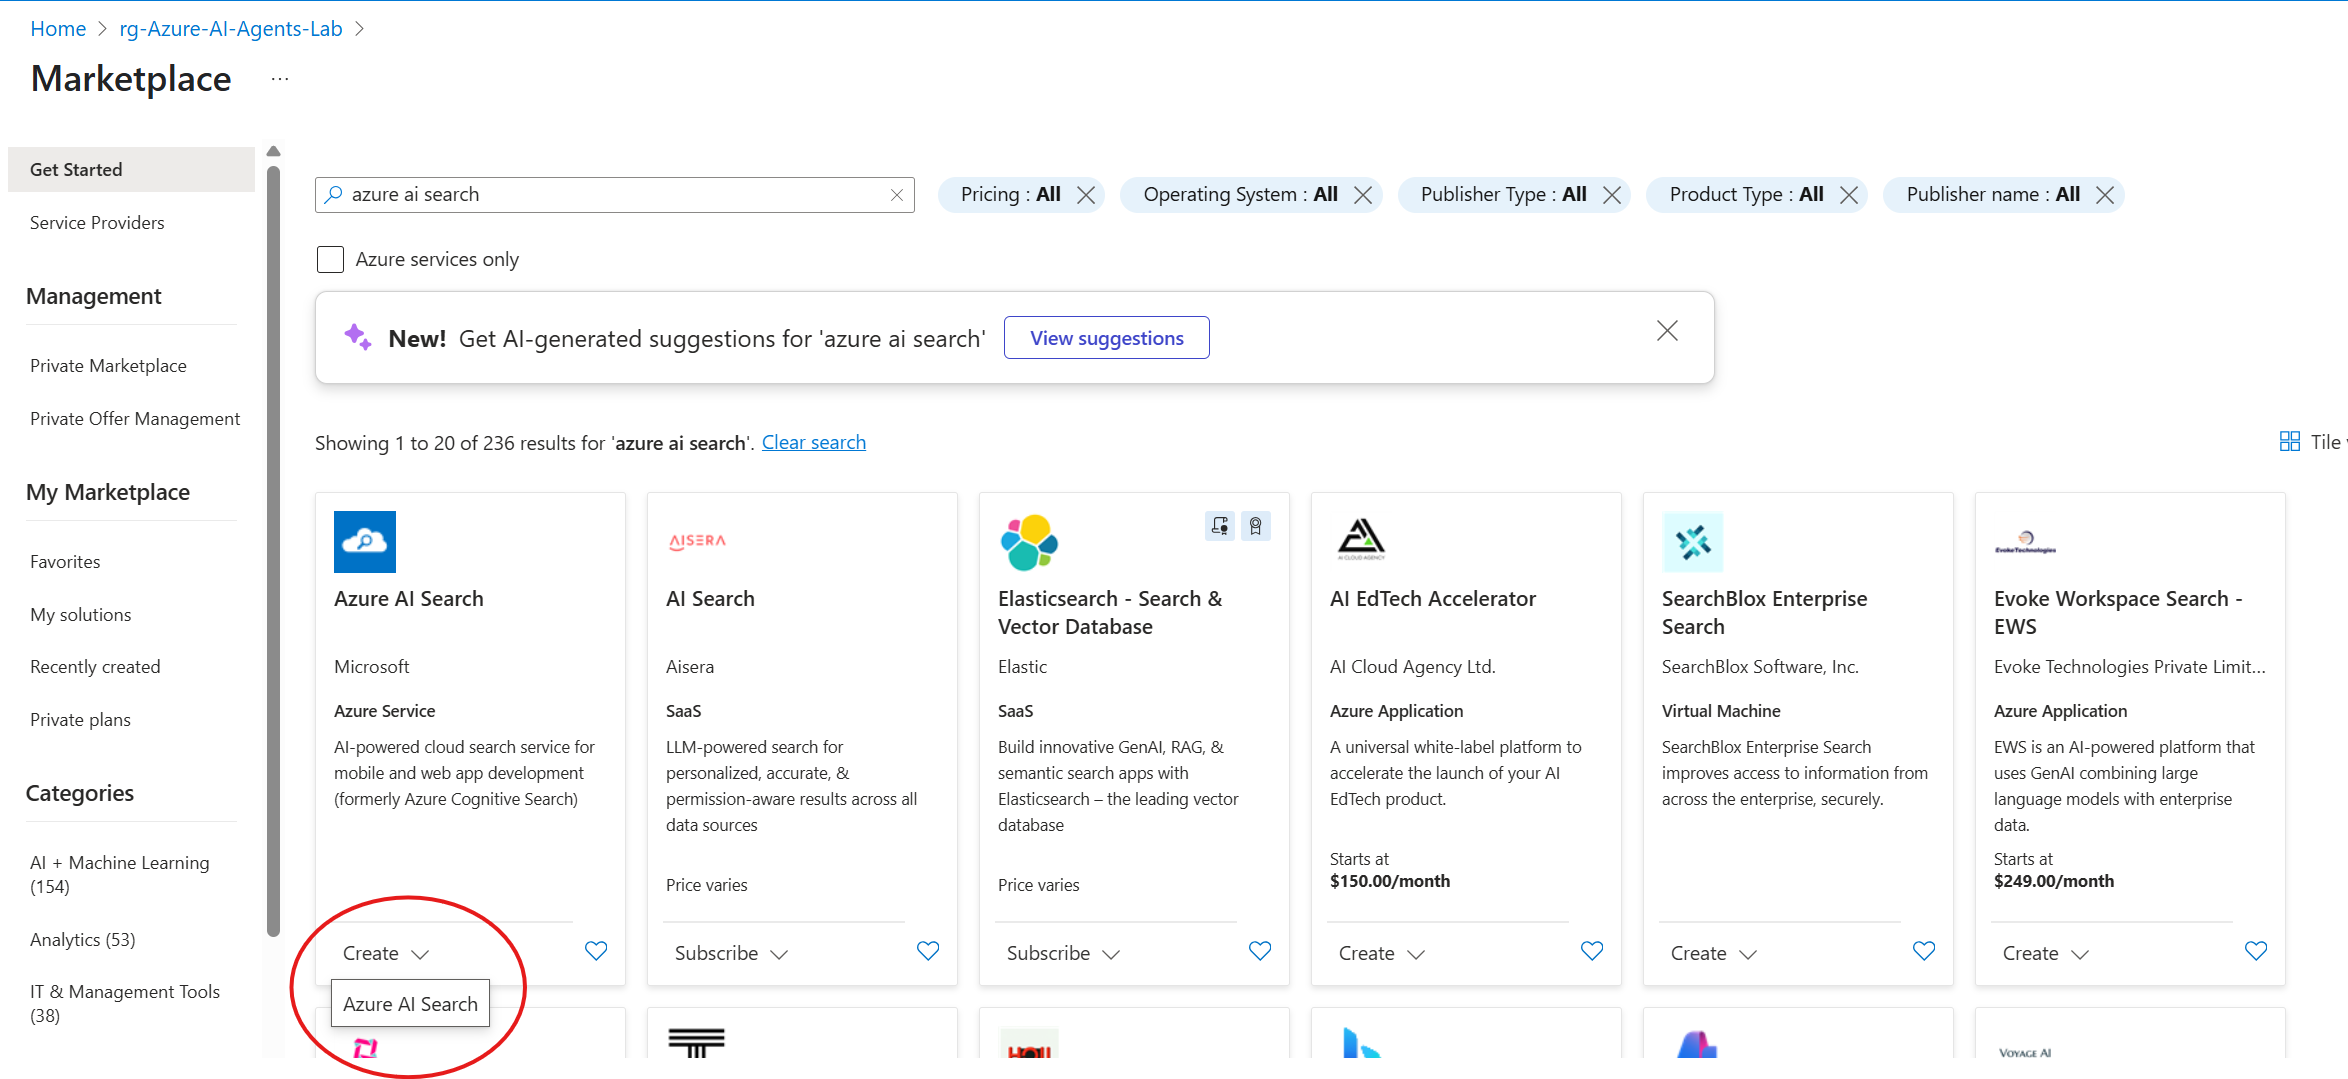

3. Select your subscription and resource group. Create a name and select location. Select Standard for Pricing tier if not already selected. Click **Review + create**. Click **Create**.
4. Once your resource has been provisioned, select **Go to resource**. 

##### Enabling Proper Permissions

1. Navigate to your Azure AI Search resource and under **Settings** in the left menu, type and select **Keys**. 
2. Under **API Access control** select **Both**. Select **Yes** to enabling changes, if prompted.
3. Now, under **Settings** in the left menu, type and select **Identity**. 
4. Under System assigned set the Status to **On** and click **Save**. Click **Yes**, if prompted.
5. Now, navigate to the storage account resource for your project. You can do this by going back to your resource groups homepage and selecting the resource noted as 'storage account.'

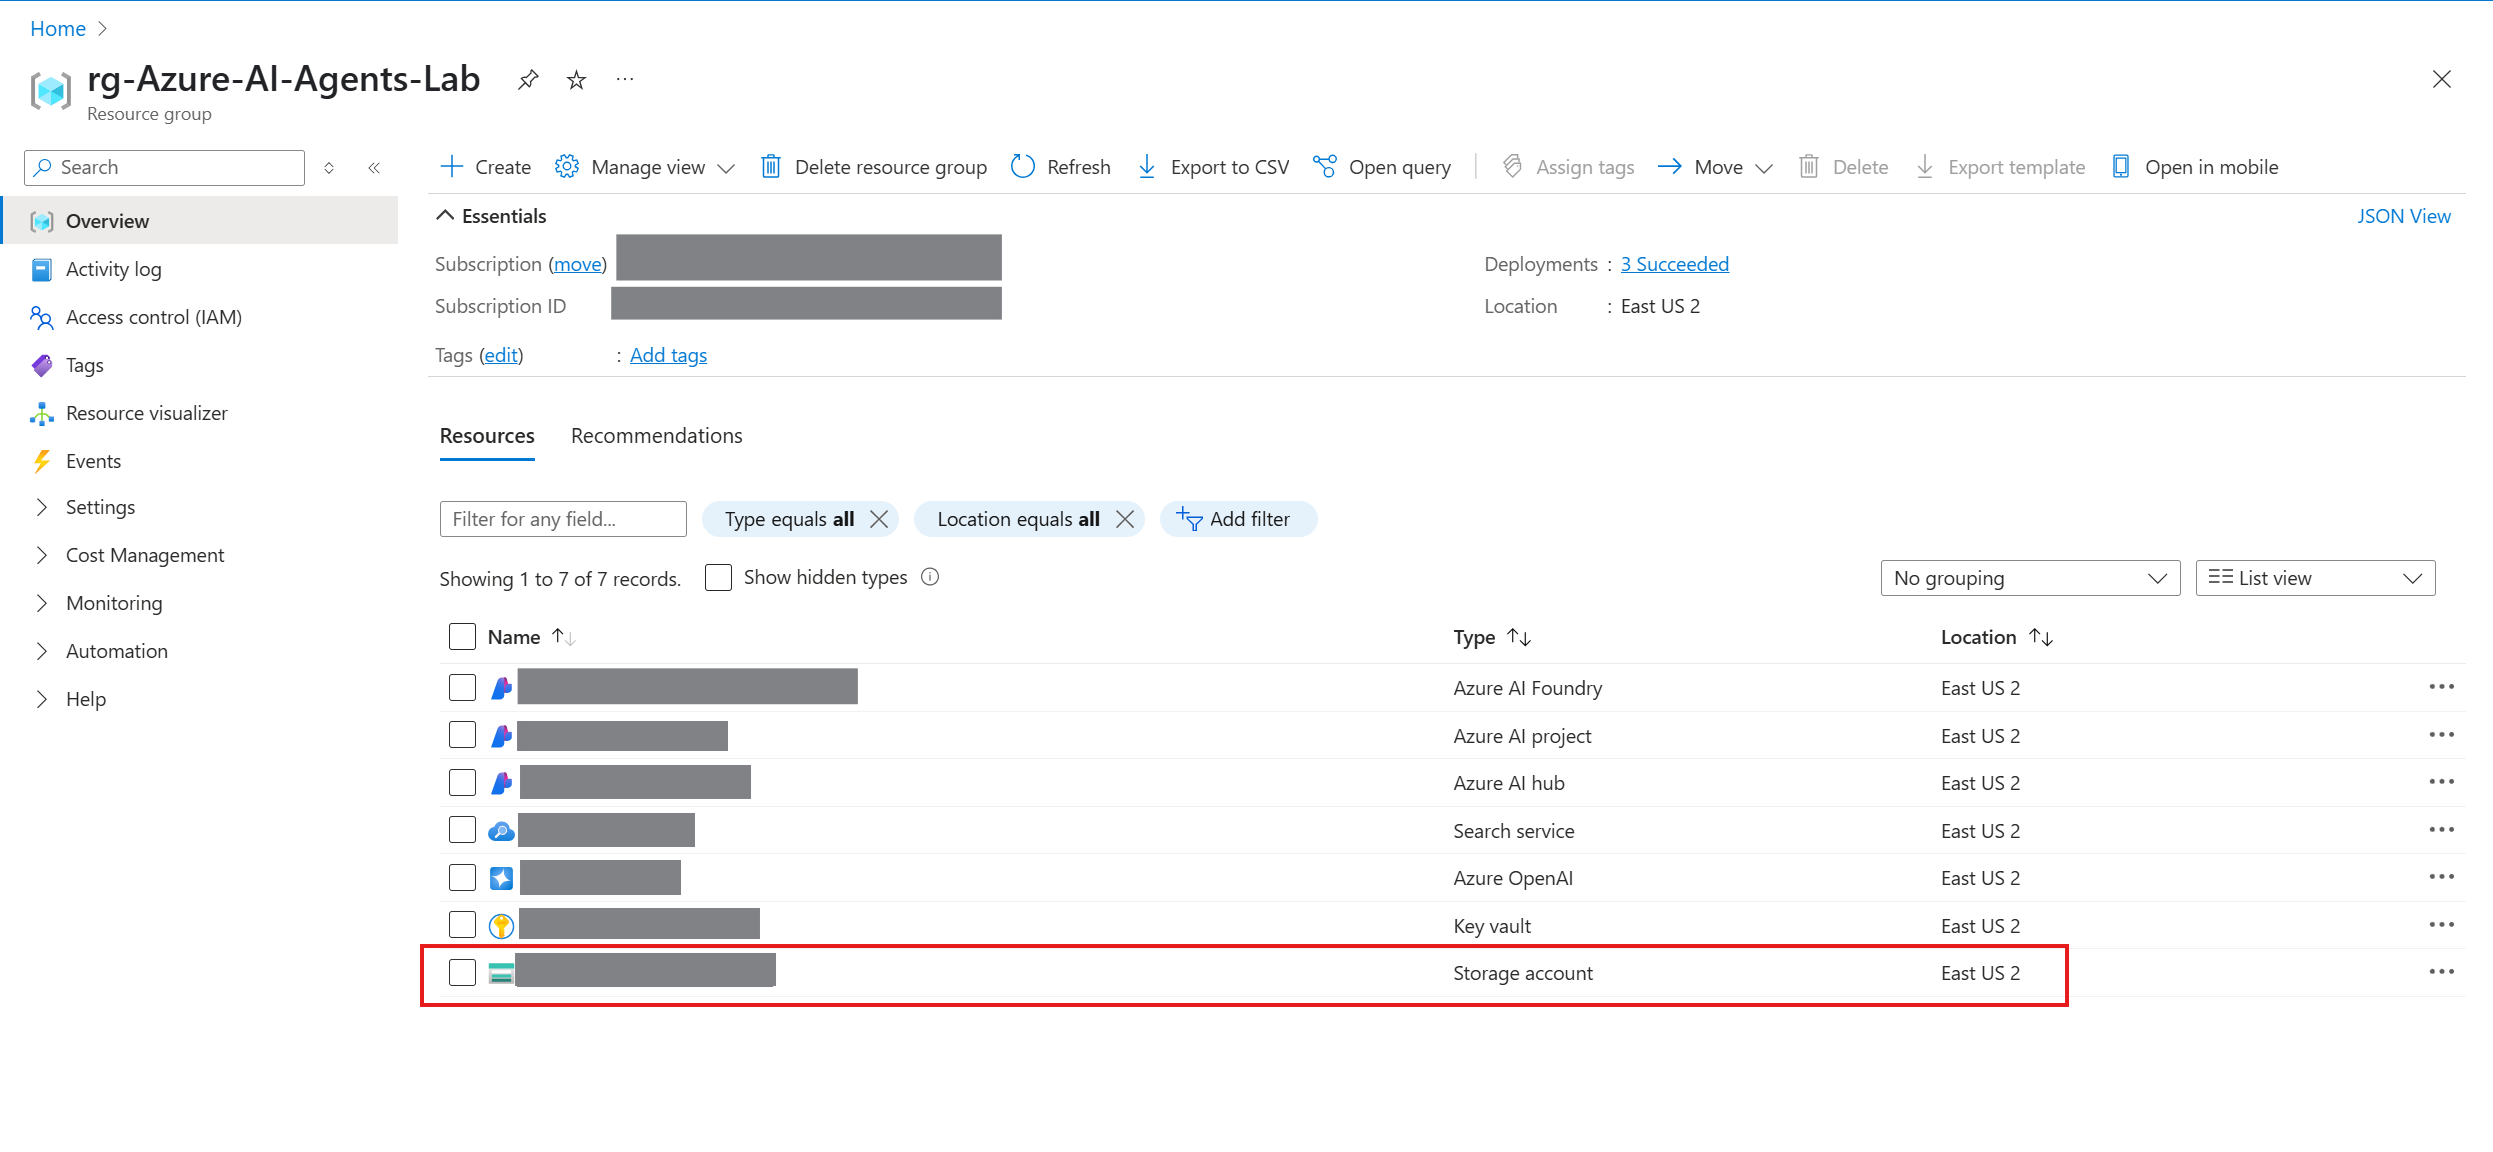

6. On the left side pane, type in and select **Access Control (IAM)**. Select **Add role assignment** and assign Storage Blob Data Reader role to the search sevice identity. 

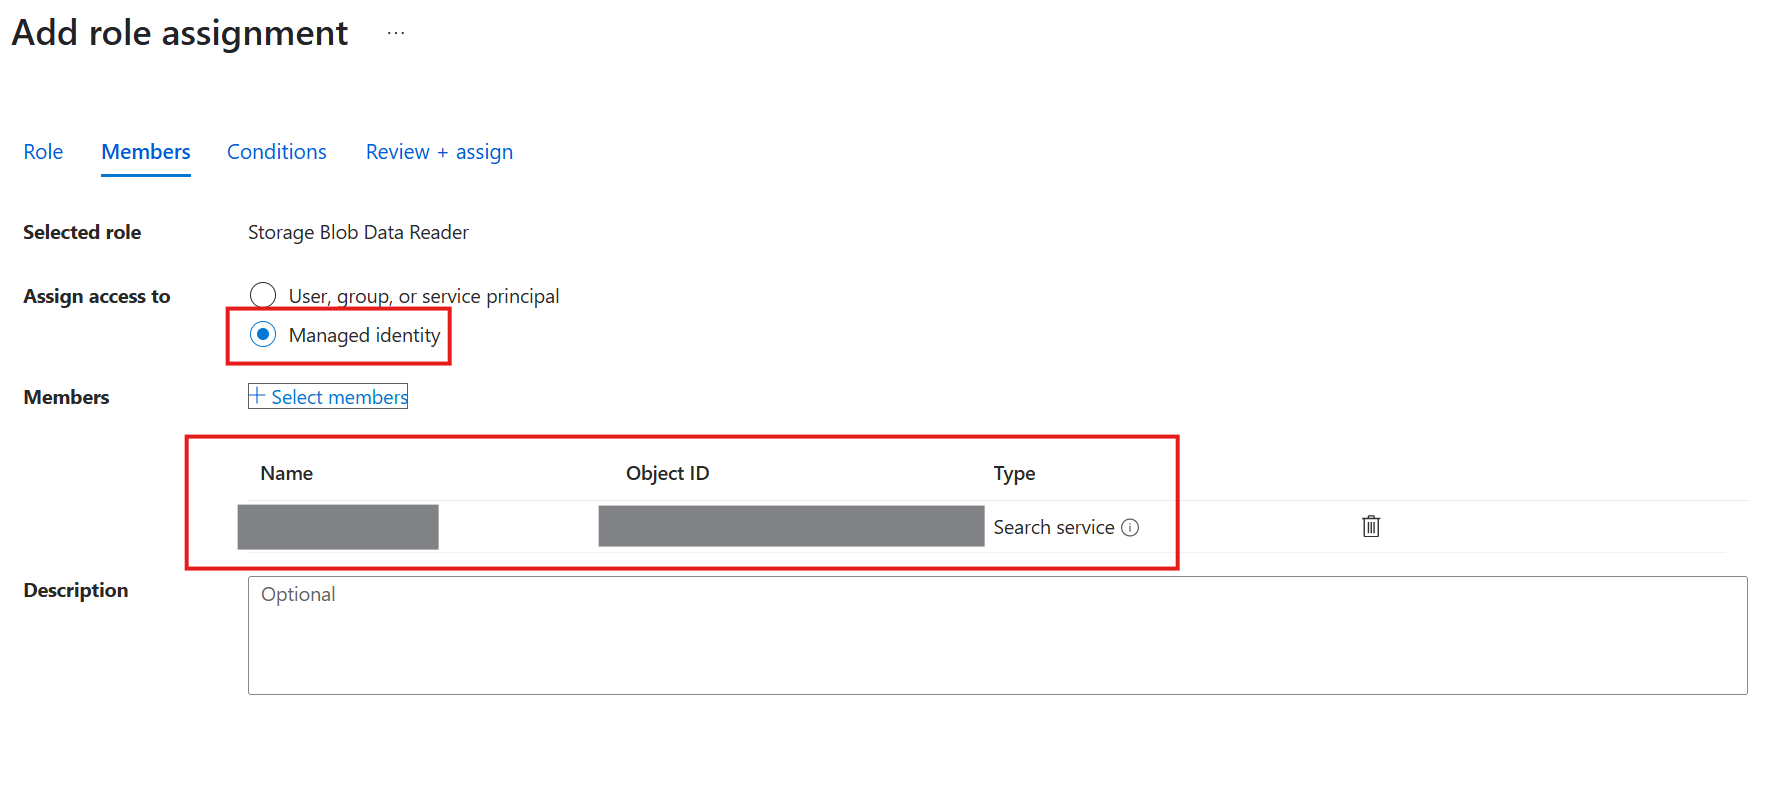

7. From there, exit that resource and click on your **Azure OpenAI** resource in your resource group. 
    1. Select **Access control (IAM)**.
    2. Select **Add**, and then select **Add role assignment**.
    3. Under **Job function roles**, select Cognitive Services OpenAI User, and then select **Next**.
    4. Under **Members**, select Managed identity, and then select Members.
    5. Filter by subscription and resource type (search services), and then select the managed identity of your search service.
    6. Select **Review + assign**.




#### Step 5: Install dependencies, create a virtual environment, and create an environment variables file

1. Open a new terminal and navigate to the AZURE-AI-AGENTS-LABS project directory, which you cloned from GitHub. Run the below powershell commands to create and activate your virtual environment:
    
    ```powershell
    python -m venv venv
    venv/Scripts/activate
2. Still in the AZURE-AI-AGENTS-LABS project directory, run the below powershell command. This installs all the required packages:
    
    ```powershell
    pip install -r requirements.txt
3. Still in the AZURE-AI-AGENTS-LABS project directory, run the below powershell command. This creates your .env file:
    
    ```powershell
    cp sample.env .env
4. Update your newly created .env file with your environment variables
    1. You'll need your Foundry Project connection string, which you can get from the **Overview** page:
    
    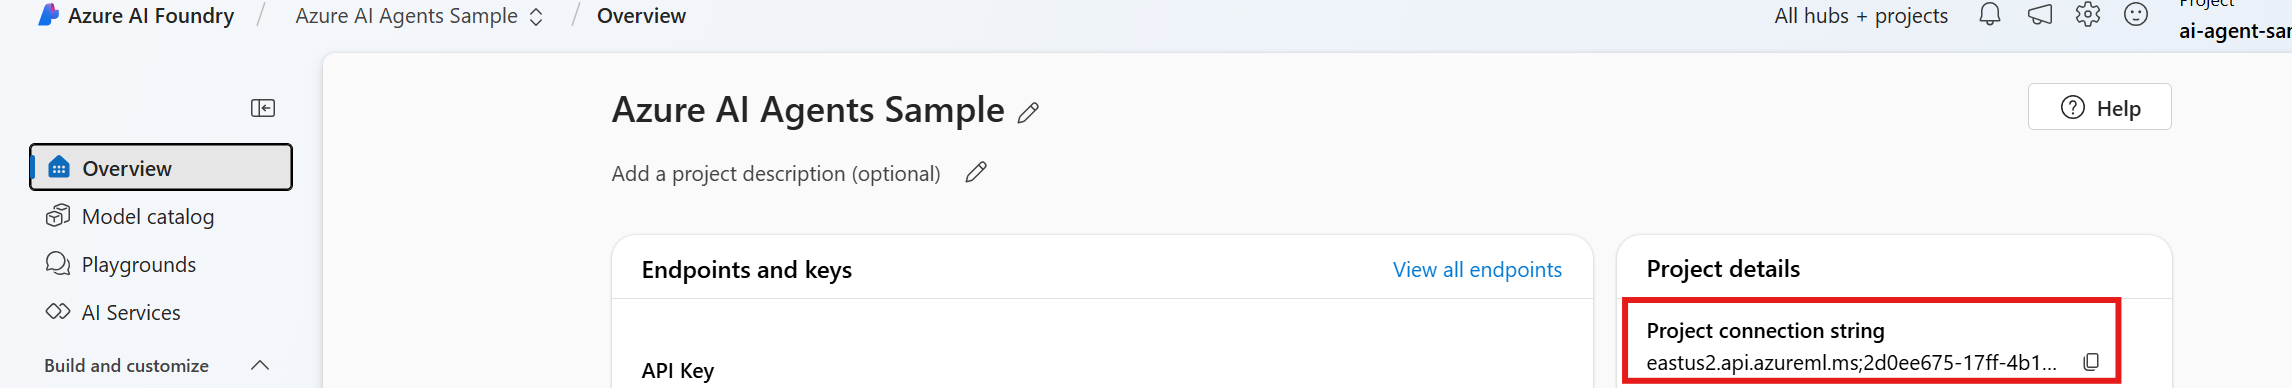

    2. You'll also need your model name, endpoint, and API key. You can get this information by navigating to **Models + endpoints** under **My assets**. Click on the `gpt-4o` model that you deployed and you should see the needed environment variables.

5. Be sure to save your .env file after updating.

#### Step 5: Test your lab environment

To test that your lab was setup successfully, run the below code that sends a message to the deployed model, asking it to tell a joke.

In [1]:
# Import packages
import os
from azure.ai.projects import AIProjectClient
from azure.identity import DefaultAzureCredential
from dotenv import load_dotenv

load_dotenv() # Load environment variables from .env file

True

In [2]:
# Get the project connection string and model from environment variables, which are needed to make a call to the LLM
project_connection_string = os.getenv("AIPROJECT_CONNECTION_STRING")
model = os.getenv("CHAT_MODEL")

In [3]:
# Use the connection string to connect to your Foundry project
project = AIProjectClient.from_connection_string(
    conn_str=project_connection_string, credential=DefaultAzureCredential()
)

In [4]:
# Chat with the gpt-4o model
chat = project.inference.get_chat_completions_client()
response = chat.complete(
    model=model,
    messages=[
        {
            "role": "system",
            "content": "You are an AI assistant that tells jokes for toddlers.",
        },
        {"role": "user", "content": "Hey, can you tell a joke about teddy bear?"},
    ],
)

print(response.choices[0].message.content)

Sure! Why did the teddy bear say “no” to dessert?

Because he was stuffed!
